In [69]:
from glob import glob
import pandas as pd
from kid_readout.analysis import resonator, plot_resonator
from notebooks.library import display
display.hide_code()

In [2]:
def load_s2p_re_im(filename):
    f_GHz, S11RE, S11IM, S21RE, S21IM, S12RE, S12IM, S22RE, S22IM = np.loadtxt(filename, unpack=True, skiprows=23)
    
    df = pd.DataFrame.from_dict({'f': 1e9 * f_GHz,
                                 's11': S11RE + 1j * S11IM,
                                 's21': S21RE + 1j * S21IM,
                                 's12': S12RE + 1j * S12IM,
                                 's22': S22RE + 1j * S22IM})
    return df

In [5]:
directory = '/Users/daniel/Johnson+Miller/mkid/multichroic/starcryo/160105/coupling/'

In [20]:
files = glob(directory + '2016-01-19_????_MHz.s2p')

In [21]:
dfs = [load_s2p_re_im(f) for f in files]

In [37]:
np.array(dfs[0].f) < 2.29e9

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [53]:
rs = []
offset = 0.2e-3
for df in dfs:
    f_center = df.f.mean()
    mask = np.array((f_center * (1 - offset) < df.f) & (df.f < f_center * (1 + offset)))
    rs.append(resonator.Resonator(np.array(df.f)[mask], np.array(df.s21)[mask]))

# Raw sweeps

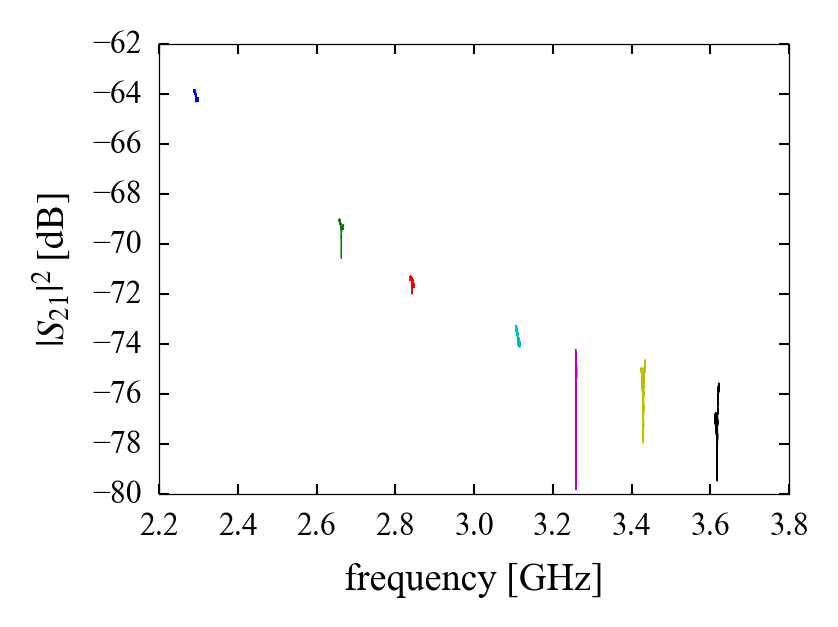

In [72]:
fig, ax = plt.subplots()

for df in dfs:
    ax.plot(1e-9 * df.f,
            20 * np.log10(np.abs(df.s21)))

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

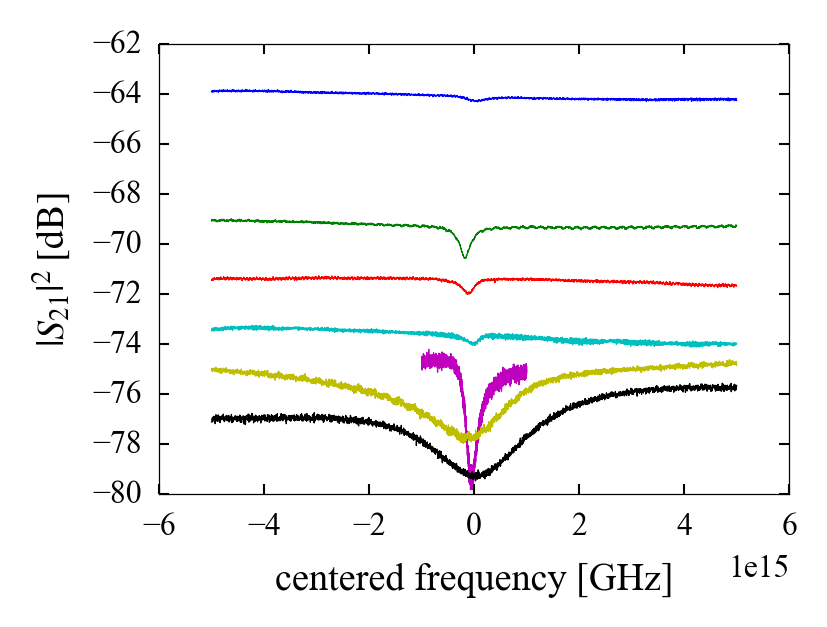

In [73]:
fig, ax = plt.subplots()

for df in dfs:
    ax.plot(1e9 * (df.f - df.f.mean()),
            20 * np.log10(np.abs(df.s21)))

ax.set_xlabel('centered frequency [GHz]')
ax.set_ylabel(r'$|S_{21}|^2 \; [\mathrm{dB}]$');

# Resonator fits

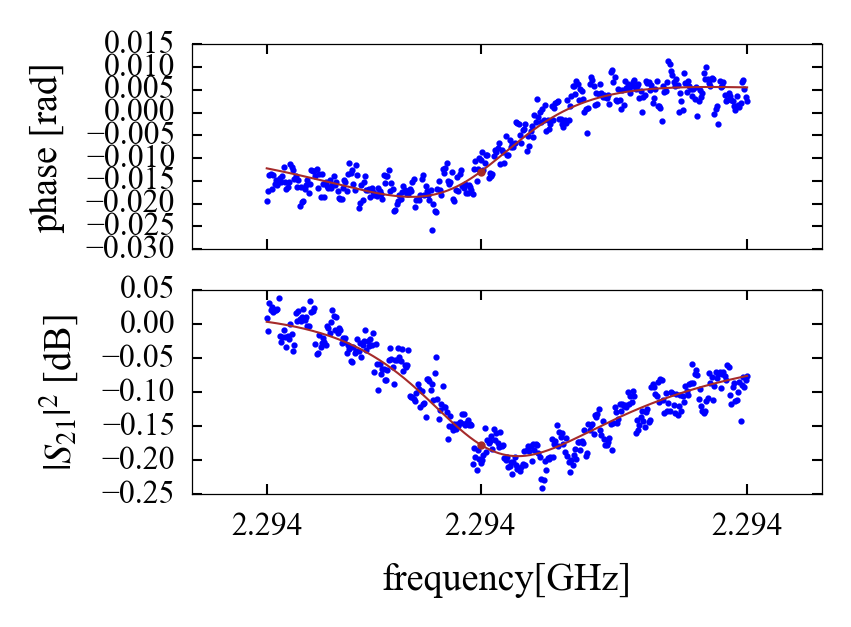

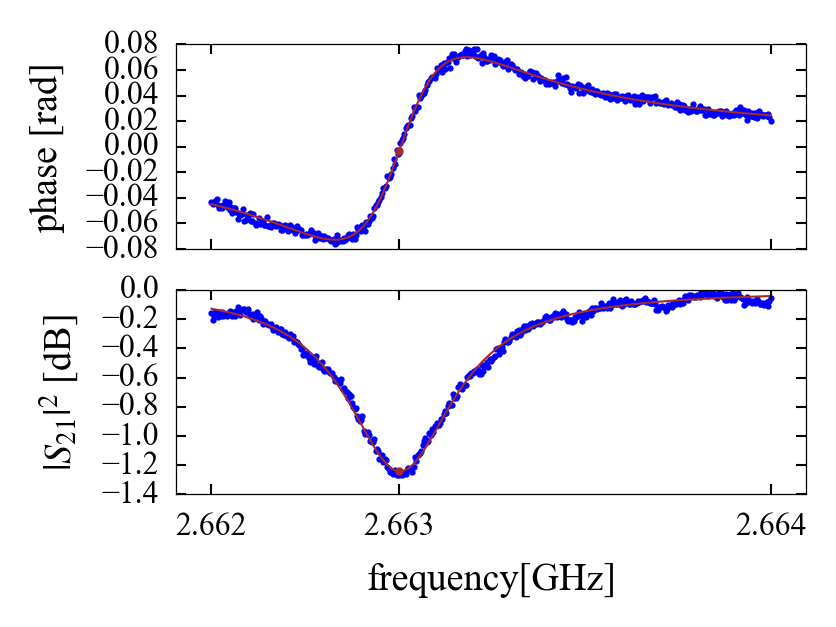

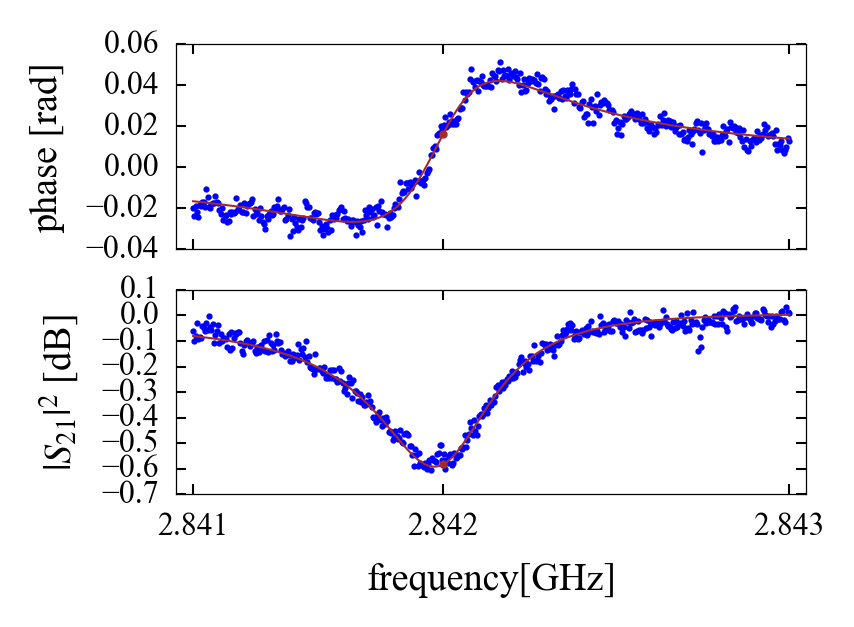

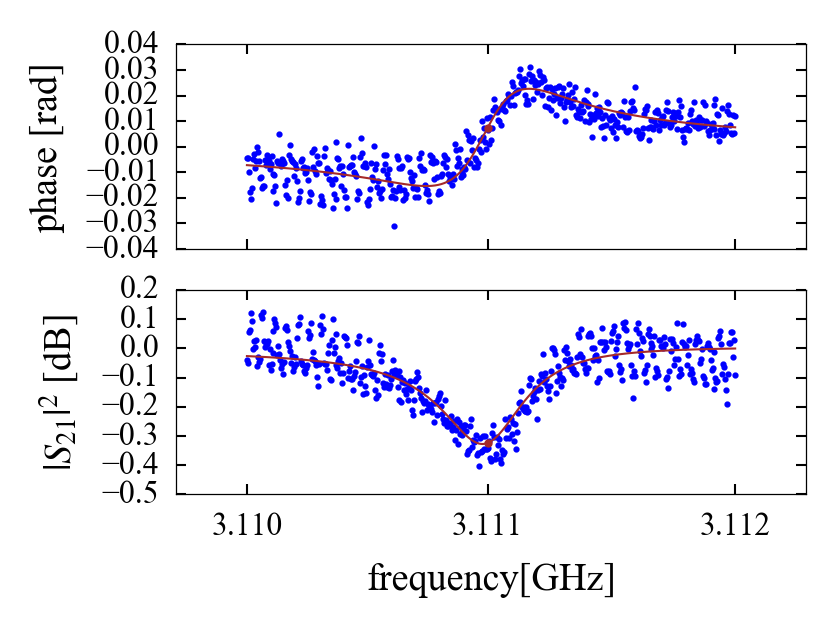

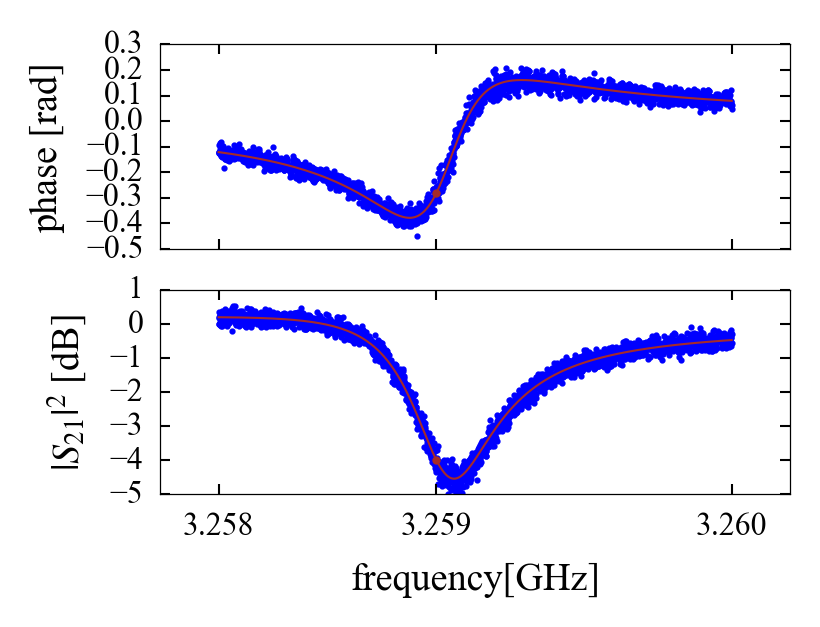

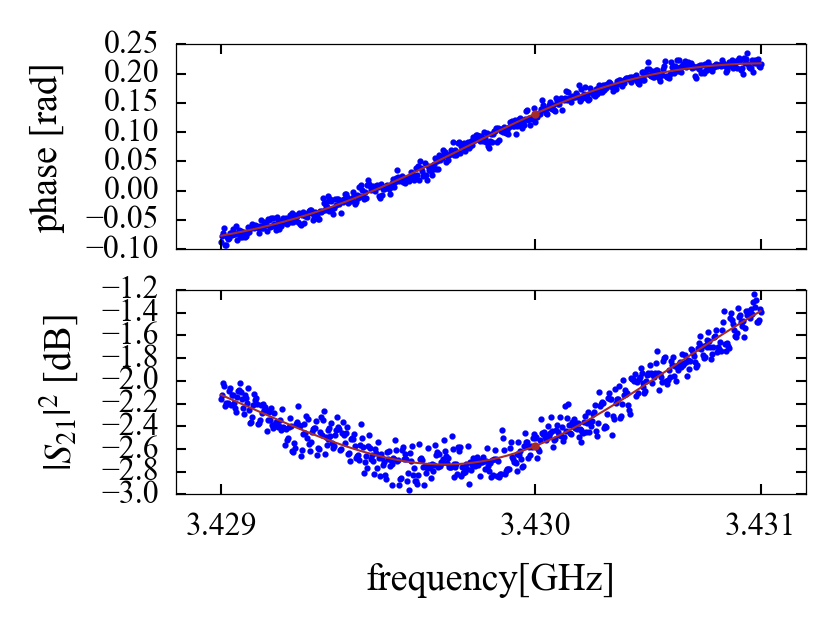

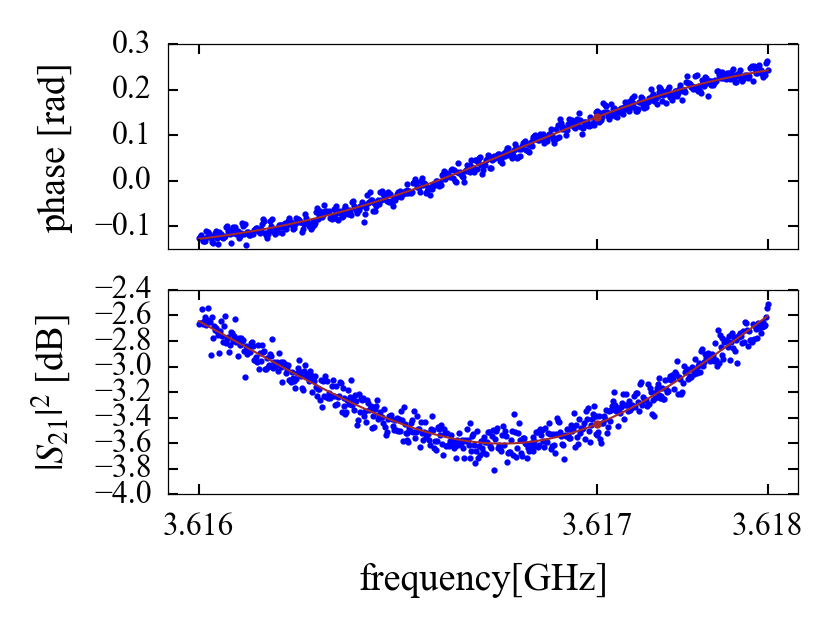

In [74]:
for r in rs:
    plot_resonator.amplitude_and_phase(r, normalize_s21=True, freq_scale=1e-9, xlabel='frequency[GHz]')

# Quality factors

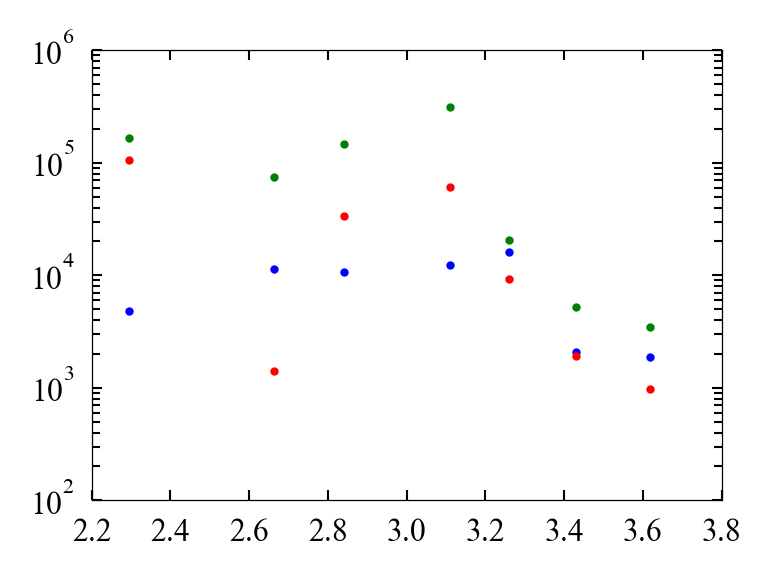

In [61]:
fig, ax = plt.subplots()

for r in rs:
    ax.plot(1e-9 * r.f_0, r.Q_i, '.b')
    ax.plot(1e-9 * r.f_0, r.Q_e_real, '.g')
    ax.plot(1e-9 * r.f_0, abs(r.Q_e_imag), '.r')
    
ax.set_yscale('log')

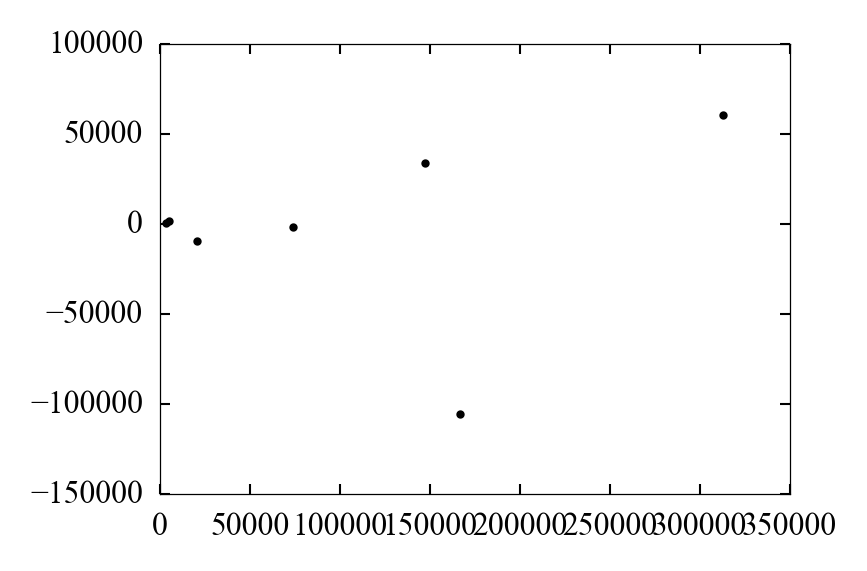

In [62]:
fig, ax = plt.subplots()

for r in rs:
    ax.plot(r.Q_e_real, r.Q_e_imag, '.k')

In [45]:
[r.Q_i for r in rs]

[4788.8841476818088,
 11291.303204434131,
 10646.974188013233,
 12403.317607500388,
 16040.514188872416,
 2180.3588503066044,
 1928.6643420684932]

In [46]:
[r.Q_e_real for r in rs]

[168584.49130806819,
 72958.192526400075,
 145320.86276727452,
 324108.04576118436,
 20659.97220013227,
 5867.9652380674297,
 3844.8322601794539]

In [47]:
[r.Q_e_imag for r in rs]

[-102973.05277486122,
 -2911.1978774568997,
 28665.169607267017,
 32299.796782548074,
 -9158.5517489133636,
 2575.3384978040121,
 1034.7578402078943]

In [66]:
[r.Q for r in rs]

[4721.6778684200381,
 9879.4417973818709,
 10081.536789362523,
 11896.639640605055,
 9753.5486248612197,
 1548.9187582568009,
 1252.5458705098247]